In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import truncnorm

In [2]:
#Domain of X
xdomain = [-3, 3]

In [3]:
def pdf(x):
    """
    Probability distribution function for Random Variable X
    from which we want to sample points. Here we assume
    we have truncated standard normal distribution in the domain of -3 to 3
    """
    return truncnorm.pdf(x, xdomain[0], xdomain[1])

In [4]:
def random_point_within_enveloping_region():
    """
    """
    x = random.uniform(xdomain[0], xdomain[1])
    y = random.uniform(0, 0.4167)
    return (x,y)

In [5]:
#Number of sample points to sample
n = 100

In [6]:
#Creating two arrays to capture accepted and rejected points
accepted = []
rejected = []

In [7]:
#Run this loop until we got required number of valid points
while len(accepted) < n:
 
    #Get random point
    x, y = random_point_within_enveloping_region()
 
    #If y is below blue curve then accept it
    if y < pdf(x):
       accepted.append((x, y))
    #otherwise reject it.
    else:
       rejected.append((x, y))

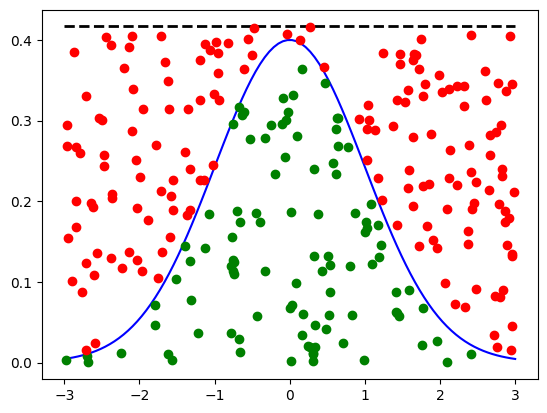

In [13]:
#Plot the graph
x = np.linspace(-3, 3, 100)
plt.plot(x, [pdf(i) for i in x], color='blue')  # Plot Random Variable X
plt.plot(x, [0.4167 for i in x], color='black', ls='dashed', lw=2)  # Plot Enveloping Region
plt.plot([x[0] for x in accepted], [x[1] for x in accepted], 'go')  # Plot Accepted Points
plt.plot([x[0] for x in rejected], [x[1] for x in rejected], 'ro')  # Plot Rejected Points
plt.show()

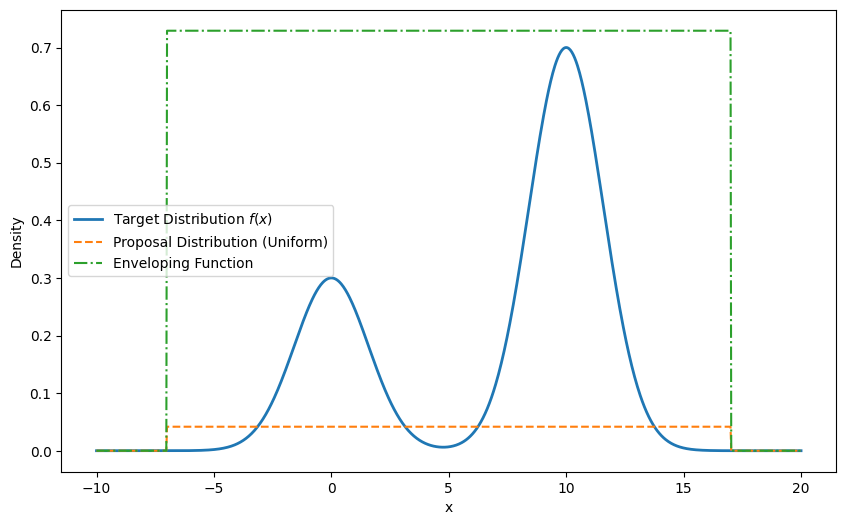

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

def target_distribution(x):
    return 0.3 * np.exp(-0.2 * x**2) + 0.7 * np.exp(-0.2 * (x - 10)**2)

x = np.linspace(-10, 20, 1000)
target_pdf = target_distribution(x)

domain = [-7, 17]
proposal_pdf = uniform.pdf(x, loc=domain[0], scale=domain[1]-domain[0])

max_target = np.round(np.max(target_pdf),2)
max_proposal = np.round(np.max(proposal_pdf), 2)

enveloping_constant = max_target/ max_proposal
enveloping_function = proposal_pdf * enveloping_constant

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(x, target_pdf, label='Target Distribution $f(x)$', linewidth=2)
plt.plot(x, proposal_pdf, label='Proposal Distribution (Uniform)', linestyle='--')
plt.plot(x, enveloping_function, label='Enveloping Function', linestyle='-.')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()


In [54]:
from numpy.random import uniform

# 제안 분포에서 하나의 샘플 x0 추출
x0 = uniform(low=domain[0], high=domain[1])

In [61]:
# smaple x0에 대해 f(x0)와 Mg(x0)의 값 비교

f_x0 = target_distribution(x0)

proposal_pdf_value = 1 / (domain[1] - domain[0])
Mg_x0 = enveloping_constant * proposal_pdf_value

compare_value = f_x0/Mg_x0

In [99]:
# 균일 분포에서 랜덤한 값 추출
random_sample = uniform(low=0, high=1)
if random_sample < compare_value:
    print("accept")

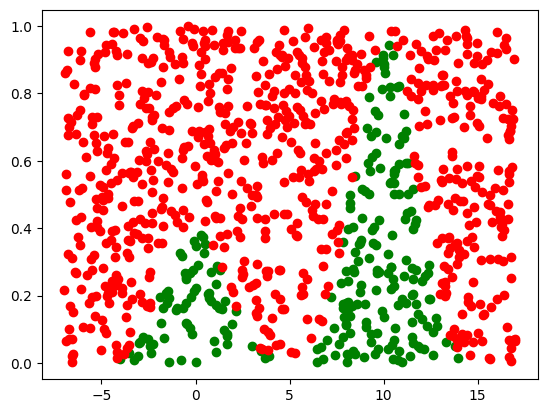

In [130]:
proposal_pdf_value = 1 / (domain[1] - domain[0])
accepted = []
rejected = []

def rejection_sampling():
    # 제안 분포에서 하나의 샘플 x0 추출
    x0 = uniform(low=domain[0], high=domain[1])

    # smaple x0에 대해 f(x0)와 Mg(x0)의 값 비교
    f_x0 = target_distribution(x0)
    Mg_x0 = enveloping_constant * proposal_pdf_value
    compare_value = f_x0/Mg_x0

    # 균일 분포에서 랜덤한 값 추출
    y_0 = uniform(low=0, high=1)

    # 기각 채택 여부 결정
    if y_0 < compare_value:
        accepted.append((x0, y_0))
    else:
        rejected.append((x0, y_0))

# sampling 1000번 수행
N = 1000
for i in range(0, N):
    rejection_sampling()

plt.plot([x[0] for x in accepted], [x[1] for x in accepted], 'go')  # Plot Accepted Points
plt.plot([x[0] for x in rejected], [x[1] for x in rejected], 'ro')  # Plot Rejected Points
plt.show()